# Libraries

All the functions are implement in ```functions.py``` file.

In [1]:
from functions import *
import pandas as pd

# Download original dataset

The images are avaible in Google Drive link.

In [2]:
download_and_extract_gdrive_zip("1bRG21aGbC4XdxqVw5fLAnI2WYJyRNNXp")

Downloading...
From (original): https://drive.google.com/uc?id=1bRG21aGbC4XdxqVw5fLAnI2WYJyRNNXp
From (redirected): https://drive.google.com/uc?id=1bRG21aGbC4XdxqVw5fLAnI2WYJyRNNXp&confirm=t&uuid=fbce32b8-7557-4bcf-b662-ece831737a12
To: c:\Users\rezio\OneDrive\Documentos\.git codes\chloride_ingress_probabilistic_model\file_downloaded.zip
100%|██████████| 147M/147M [00:05<00:00, 25.3MB/s] 


Extracting file_downloaded.zip...
Extraction concluded!


# Get contours

In [3]:
_ = process_images_to_json('dataset/binary-masks', 'dataset_contours_aggregate', 'dataset//binary_patchs')

Contours by file extracted and saved to dataset_contours_aggregate_by_image.json
Contours cropped and saved to dataset//binary_patchs.
Contours by file extracted and saved to dataset_contours_aggregate_by_patch.json
Contours by file extracted and saved to dataset_contours_aggregate_by_patch.csv with 7039 samples.


# Clean "strange" contours

What are "strange contours"?

- non-convex
- multiple contours

### Multiple contours

In [ ]:
purge_1_list = find_multipolygon_contours('dataset_contours_aggregate_by_patch.json')

[MultiPolygon] 01_66.png
[MultiPolygon] 03_7.png
[MultiPolygon] 03_44.png
[MultiPolygon] 03_63.png
[MultiPolygon] 03_71.png
[MultiPolygon] 03_507.png
[MultiPolygon] 07_329.png
[MultiPolygon] 08_35.png
[MultiPolygon] 08_63.png
[MultiPolygon] 08_255.png
[MultiPolygon] 09_22.png
[MultiPolygon] 10_129.png
[MultiPolygon] 13_41.png
[MultiPolygon] 13_135.png
[MultiPolygon] 14_107.png
[MultiPolygon] 15_13.png
[MultiPolygon] 15_444.png
[MultiPolygon] 16_158.png
[MultiPolygon] 16_183.png
[MultiPolygon] 17_269.png
20 images to purge


### Non-convex

In [ ]:
purge_2_list = ["01_09.png"]
purge_list = purge_1_list + purge_2_list

21 total images to purge


### Delete

In [6]:
purge_images_everywhere(
    csv_path='dataset_contours_aggregate_by_patch.csv',
    json_path='dataset_contours_aggregate_by_patch.json',
    image_dir='dataset/binary_patchs',
    delete_list=purge_list
)

Purge completed!
 - CSV rows removed (source): 20
 - JSON entries removed (source): 20
 - Images copied to the new folder: 7019
 - CSV written to:  dataset_contours_aggregate_by_patch_purge.csv
 - JSON written to: dataset_contours_aggregate_by_patch_purge.json
 - Folder created:  dataset/binary_patchs_purge


# Plot one sample of the dataset

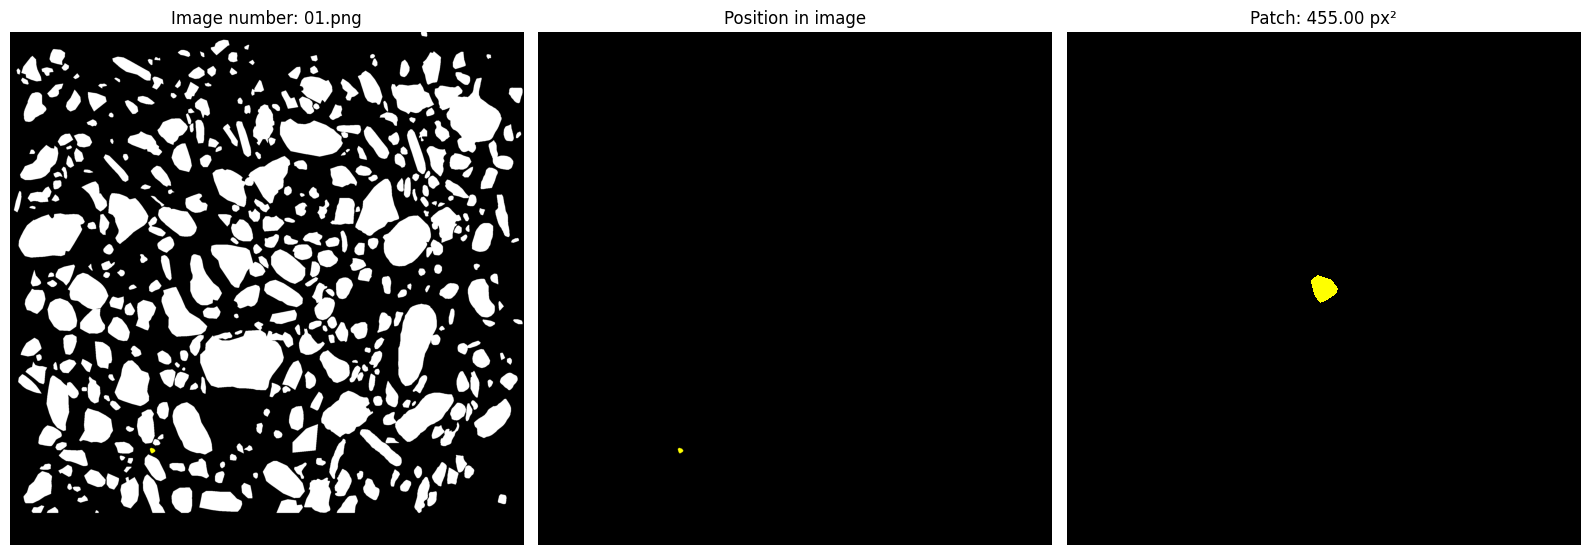

In [7]:
plot_contours_from_json("dataset_contours_aggregate_by_image.json", keys_to_plot=["01.png"]) 

# Filter contours

In [8]:
filter_images_by_diameter(threshold_diam_mm=15.0)


Images with diameter < 15.0 mm copied to: dataset/binary_patchs_filtered
Total images copied: 7038
Total images removed (>= 15.0 mm): 1
Filtered CSV saved to: dataset_contours_aggregate_by_patch_filtered.csv
Filtered contours JSON saved to: dataset_contours_aggregate_by_patch_filtered.json


# Statistics

In [9]:
df = pd.read_csv("dataset_contours_aggregate_by_patch_filtered.csv")
df.head()

,image_name,area (px),area (mm2),diameter (px),diameter (mm)
0,01_0.png,144.0,0.12960,18.384977,0.551549
1,01_1.png,1020.0,0.91800,55.927624,1.677829
2,01_2.png,1445.0,1.30050,65.551704,1.966551
3,01_3.png,6132.5,5.51925,130.816864,3.924506
4,01_4.png,5463.0,4.91670,123.988098,3.719643


In [10]:
df.describe()

,area (px),area (mm2),diameter (px),diameter (mm)
count,7038.000000,7038.000000,7038.000000,7038.000000
mean,4402.664677,3.962398,87.325329,2.619760
std,7101.609831,6.391449,62.182741,1.865482
min,0.000000,0.000000,3.162478,0.094874
25%,858.125000,0.772312,44.772216,1.343166
50%,1891.750000,1.702575,68.646641,2.059399
75%,4557.250000,4.101525,107.032810,3.210984
max,96149.000000,86.534100,486.319031,14.589571


In [11]:
df

,image_name,area (px),area (mm2),diameter (px),diameter (mm)
0,01_0.png,144.0,0.12960,18.384977,0.551549
1,01_1.png,1020.0,0.91800,55.927624,1.677829
2,01_2.png,1445.0,1.30050,65.551704,1.966551
3,01_3.png,6132.5,5.51925,130.816864,3.924506
4,01_4.png,5463.0,4.91670,123.988098,3.719643
...,...,...,...,...,...
7033,17_460.png,276.5,0.24885,29.490593,0.884718
7034,17_461.png,378.5,0.34065,31.064650,0.931939
7035,17_462.png,865.5,0.77895,46.861698,1.405851
7036,17_463.png,321.0,0.28890,29.833069,0.894992


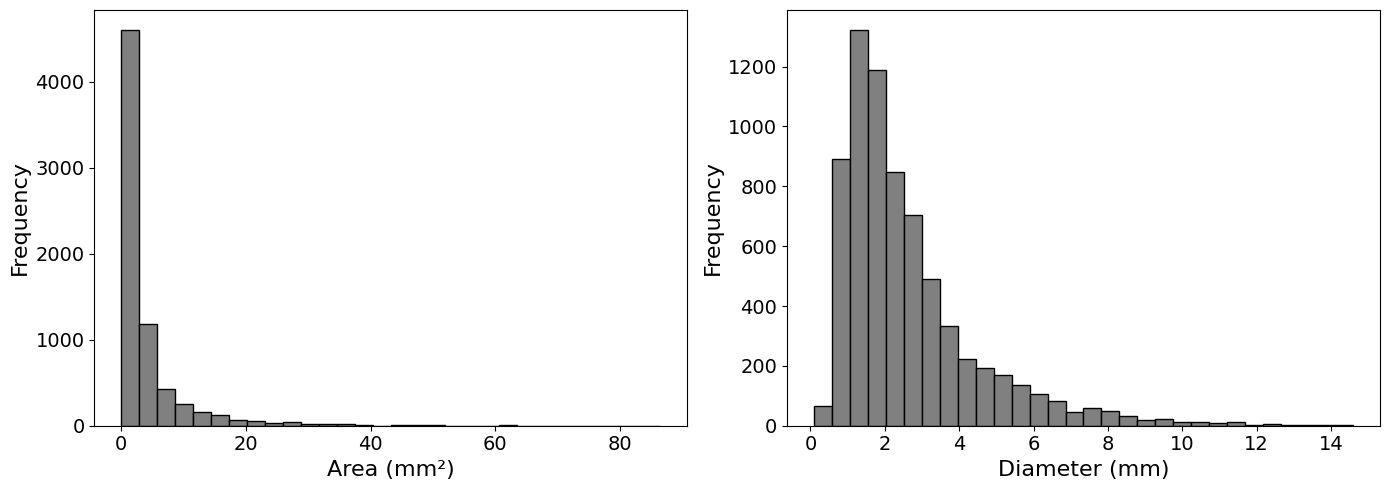

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['area (mm2)'], bins=30, color='gray', edgecolor='black')
axes[0].set_xlabel("Area (mm²)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].hist(df['diameter (mm)'], bins=30, color='gray', edgecolor='black')
axes[1].set_xlabel("Diameter (mm)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('frequency_area.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

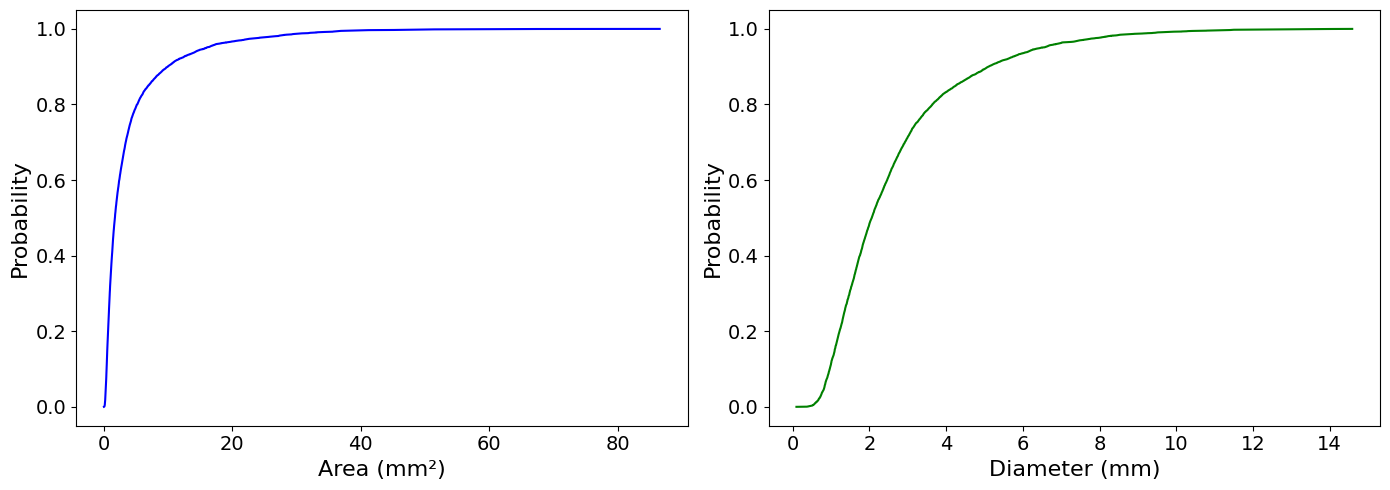

In [13]:
area_sorted, area_cdf = obtain_cdf(list(df['area (mm2)']))
diameter_sorted, diameter_cdf = obtain_cdf(list(df['diameter (mm)']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(area_sorted, area_cdf, color='blue')
axes[0].set_xlabel("Area (mm²)", fontsize=16)
axes[0].set_ylabel("Probability", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].plot(diameter_sorted, diameter_cdf, color='green')
axes[1].set_xlabel("Diameter (mm)", fontsize=16)
axes[1].set_ylabel("Probability", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('Probability_area.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

In [14]:
def sort_contours_using_uniform_pdf_and_group(csv_path: str, json_path: str, n_objects: int, n_groups: int = 20):
    """
    Sort contours using a uniform probability density function and group them. 

    :param csv_path: Path to the CSV file with contour data
    :param json_path: Path to the JSON file with contour data
    :param n_objects: Number of objects to sample
    :param n_groups: Number of groups to create

    :return: Sorted and grouped contours
    """

    with open(json_path, 'r') as f:
        contour_data = json.load(f)
    df_json = pd.DataFrame.from_dict(contour_data, orient='index')
    df_json['image_name'] = df_json.index
    df_json = df_json.reset_index(drop=True)
    df_csv = pd.read_csv(csv_path)
    df_full = pd.merge(df_json, df_csv, on='image_name')
    df_full = df_full[['image_name', 'x coordinate in 0,0', 'y coordinate in 0,0', 'diameter (px)', 'diameter (mm)', 'area (px)', 'area (mm2)']]

    df_sorted = df_full.sort_values('diameter (px)', ascending=False).reset_index(drop=True)
    group_dim = np.array_split(df_sorted.index, n_groups)
    df_sorted['group by diameter (px)'] = -1
    for i, group in enumerate(group_dim):
        df_sorted.loc[group, 'group by diameter (px)'] = i + 1

    return df_sorted